# Reservoir Computing with Cellular Automata Networks

Oscar Johansson, Chalmers University of Technology

Data Analysis for a Master's Thesis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## Choose experiments (run the code cell of interest)

All experiments:

In [3]:
file_names = ['BAB.txt','BAC.txt', 'BAD.txt','ERB.txt','ERC.txt','ERD.txt','WSB.txt','WSC.txt', 'WSD.txt','PD2B.txt', 'PD2C.txt', 'PD2D.txt', 'PD3B.txt', 'PD3C.txt', 'PD3D.txt', 'PD4B.txt', 'PD4C.txt', 'PD4D.txt']
column_names = ['BABias', 'BAAlt', 'BANoise', 'ERBias', 'ERAlt','ERNoise', 'WSBias', 'WSAlt','WSNoise', '2NBias', '2NAlt', '2NNoise', '3NBias', '3NAlt', '3NNoise', '4NBias', '4NAlt', '4NNoise']

Experiments using the Fixed Predecessor Networks:

In [ ]:
file_names = ['PD2B.txt', 'PD2C.txt', 'PD2D.txt', 'PD3B.txt', 'PD3C.txt', 'PD3D.txt', 'PD4B.txt', 'PD4C.txt', 'PD4D.txt']
column_names = ['2NBias', '2NAlt', '2NNoise', '3NBias', '3NAlt', '3NNoise', '4NBias', '4NAlt', '4NNoise']

Experiments using the standard networks:

In [ ]:
file_names = ['BAB.txt','BAC.txt', 'BAD.txt','ERB.txt','ERC.txt','ERD.txt','WSB.txt','WSC.txt', 'WSD.txt']
column_names = ['BABias', 'BAAlt', 'BANoise', 'ERBias', 'ERAlt','ERNoise', 'WSBias', 'WSAlt','WSNoise']

Only PD-2:

In [ ]:
file_names = ['PD2B.txt', 'PD2C.txt', 'PD2D.txt']
column_names = ['2NBias', '2NAlt', '2NNoise']

Only PD-3 and PD-4:

In [ ]:
file_names = ['PD3B.txt', 'PD3C.txt', 'PD3D.txt', 'PD4B.txt', 'PD4C.txt', 'PD4D.txt']
column_names = ['3NBias', '3NAlt', '3NNoise', '4NBias', '4NAlt', '4NNoise']

## Create Dataframe

In [5]:
# Initialize a dictionary to hold the data for each file
full_data = {}

for file_index, file_name in enumerate(file_names):
    # Initialize a list to store the data for the current file
    columns_data = []

    with open(file_name, 'r') as file:
        for line in file:
            parts = [part.strip() for part in line.strip().split(',')]
            # Skip lines that are empty or don't have data beyond the ID
            if len(parts) > 1:
                data = [float(x) for x in parts[1:]]
                while len(columns_data) < len(data):
                    columns_data.append([])
                for i, value in enumerate(data):
                    columns_data[i].append(value)

    # Assign the list of values for the current file to the appropriate column in the data dictionary
    full_data[f'File{file_index+1}'] = columns_data

# Convert the dictionary to a DataFrame
df = pd.DataFrame(full_data)

# Optional: Give meaningful column names
df.columns = column_names

In [6]:
# Display the combined dataframe
df

,BABias,BAAlt,BANoise,ERBias,ERAlt,ERNoise,WSBias,WSAlt,WSNoise,2NBias,2NAlt,2NNoise,3NBias,3NAlt,3NNoise,4NBias,4NAlt,4NNoise
0,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.41, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5,...","[0.5, 0.5, 0.47, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
1,"[0.56, 0.66, 0.53, 0.5, 0.48, 0.52, 0.58, 0.8,...","[0.46, 0.53, 0.5, 0.44, 0.49, 0.49, 0.6, 0.49,...","[0.51, 0.52, 0.53, 0.49, 0.54, 0.5, 0.5, 0.5, ...","[0.66, 0.5, 0.65, 0.61, 0.62, 0.65, 0.52, 0.58...","[0.96, 0.54, 0.45, 0.51, 0.5, 0.47, 0.69, 0.52...","[0.79, 0.5, 0.69, 0.5, 0.73, 0.5, 0.47, 0.63, ...","[0.53, 0.69, 0.49, 0.62, 0.48, 0.71, 0.62, 0.6...","[0.8, 0.79, 0.86, 0.94, 0.5, 0.5, 0.53, 0.59, ...","[0.52, 0.95, 0.73, 0.53, 0.5, 0.44, 0.48, 0.43...","[0.7, 0.67, 0.61, 0.71, 0.7, 0.68, 0.63, 0.69,...","[0.65, 0.48, 0.54, 0.61, 0.59, 0.58, 0.38, 0.4...","[0.48, 0.48, 0.49, 0.5, 0.57, 0.48, 0.53, 0.5,...","[0.66, 0.65, 0.68, 0.69, 0.57, 0.56, 0.61, 0.6...","[0.5, 0.53, 0.5, 0.5, 0.5, 0.5, 0.43, 0.53, 0....","[0.49, 0.47, 0.49, 0.5, 0.47, 0.5, 0.5, 0.5, 0...","[0.5, 0.5, 0.5, 0.5, 0.44, 0.48, 0.5, 0.5, 0.5...","[0.5, 0.5, 0.5, 0.49, 0.51, 0.5, 0.49, 0.5, 0....","[0.5, 0.5, 0.5, 0.51, 0.5, 0.51, 0.47, 0.49, 0..."
2,"[0.7, 0.5, 0.5, 0.5, 0.5, 0.57, 0.5, 0.5, 0.5,...","[0.74, 0.5, 0.5, 0.5, 0.5, 1.0, 0.49, 0.5, 0.4...","[0.5, 0.5, 0.9, 0.79, 0.72, 0.74, 0.5, 0.56, 0...","[0.5, 0.5, 0.76, 0.5, 0.73, 0.5, 0.5, 0.73, 0....","[0.5, 0.99, 0.47, 0.54, 0.6, 0.49, 0.76, 0.5, ...","[0.5, 0.49, 0.5, 0.5, 0.51, 0.79, 0.47, 0.69, ...","[0.5, 0.74, 0.49, 0.73, 0.49, 0.71, 0.5, 0.73,...","[0.5, 0.96, 0.99, 0.51, 0.99, 0.5, 0.99, 0.97,...","[0.5, 0.5, 0.48, 0.69, 0.5, 0.49, 0.44, 0.85, ...","[0.63, 0.5, 0.5, 0.73, 0.68, 0.76, 0.69, 0.49,...","[0.96, 0.72, 0.97, 0.5, 0.87, 0.5, 1.0, 0.82, ...","[0.81, 0.5, 0.5, 0.5, 0.83, 0.5, 0.77, 0.8, 0....","[0.5, 0.5, 0.73, 0.49, 0.78, 0.71, 0.5, 0.72, ...","[0.98, 0.98, 0.93, 0.98, 0.99, 0.63, 0.51, 1.0...","[0.61, 0.87, 0.5, 0.93, 0.85, 0.85, 0.92, 0.77...","[0.49, 0.5, 0.67, 0.71, 0.5, 0.71, 0.5, 0.5, 0...","[0.99, 0.5, 0.5, 0.99, 0.99, 1.0, 0.48, 0.99, ...","[0.89, 0.5, 0.5, 0.95, 0.48, 0.85, 0.5, 0.79, ..."
3,"[0.52, 0.62, 0.68, 0.5, 0.59, 0.43, 0.61, 0.72...","[0.68, 0.6, 0.74, 0.5, 1.0, 1.0, 0.98, 0.5, 0....","[0.59, 0.86, 0.47, 0.49, 0.56, 0.58, 0.5, 0.48...","[0.56, 0.5, 0.51, 0.64, 0.5, 0.5, 0.45, 0.5, 0...","[0.63, 0.51, 0.49, 0.53, 0.98, 0.49, 0.49, 1.0...","[0.79, 0.49, 0.5, 0.88, 0.75, 0.5, 0.52, 0.5, ...","[0.54, 0.49, 0.51, 0.46, 0.5, 0.49, 0.59, 0.72...","[0.51, 0.97, 0.51, 0.98, 0.87, 0.43, 0.58, 0.4...","[0.5, 0.88, 0.62, 0.89, 0.56, 0.5, 0.89, 0.45,...","[0.62, 0.74, 0.76, 0.6, 0.61, 0.57, 0.54, 0.62...","[0.5, 0.97, 0.5, 1.0, 0.95, 0.95, 0.81, 1.0, 0...","[0.87, 0.76, 0.77, 0.83, 0.75, 0.96, 0.87, 0.9...","[0.67, 0.81, 0.6, 0.51, 0.66, 0.72, 0.62, 0.5,...","[0.77, 0.99, 0.98, 0.53, 0.99, 0.88, 0.5, 0.96...","[0.75, 0.46, 0.67, 0.69, 0.5, 0.5, 0.53, 0.77,...","[0.52, 0.49, 0.5, 0.49, 0.49, 0.42, 0.46, 0.49...","[0.47, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.52, 0.4...","[0.5, 0.47, 0.5, 0.51, 0.49, 0.59, 0.48, 0.5, ..."
4,"[0.51, 0.5, 0.5, 0.5, 0.47, 0.49, 0.54, 0.48, ...","[0.5, 0.5, 0.51, 0.51, 0.49, 0.51, 0.45, 0.5, ...","[0.52, 0.51, 0

## Plots

### Plot all sorted averages

<ipython-input-7-84484f100d03>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('Paired', num_columns)  # Replace 'viridis' with your preferred colormap


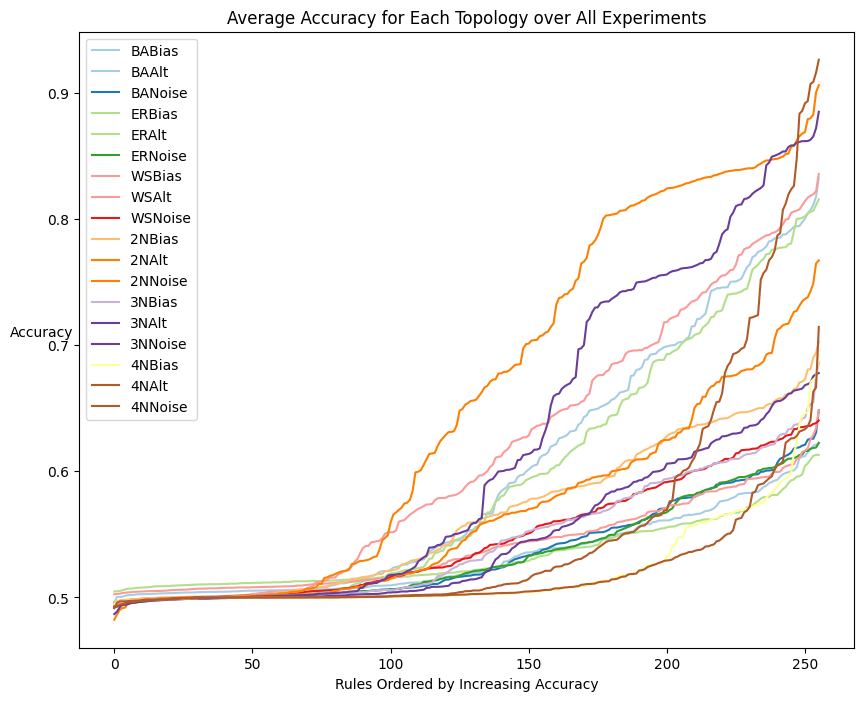

In [7]:
from matplotlib.cm import get_cmap

# Step 1: Create a new DataFrame for averages
df_averages = df.copy()

for column in df_averages.columns:
    df_averages[column] = df_averages[column].apply(lambda x: np.mean(x))

# Step 2: This step will be considered in plotting, as you might not want to alter the original DataFrame
# Number of columns to plot
num_columns = len(df_averages.columns)
# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
colormap = get_cmap('Paired', num_columns)  # Replace 'viridis' with your preferred colormap


# Step 3: Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# For each column, plot the sorted averages
for idx, column in enumerate(df_averages.columns):
    sorted_averages = df_averages[column].sort_values().reset_index(drop=True)
    ax.plot(sorted_averages, label=column, color=colormap(idx))

ax.set_ylabel('Accuracy', rotation=0)
ax.set_xlabel('Rules Ordered by Increasing Accuracy')
ax.set_title('Average Accuracy for Each Topology over All Experiments')
ax.legend()


plt.show()

### Plot the average for each topology

<ipython-input-18-f7e282ed3fe0>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = colormap = get_cmap('tab10', num_columns)


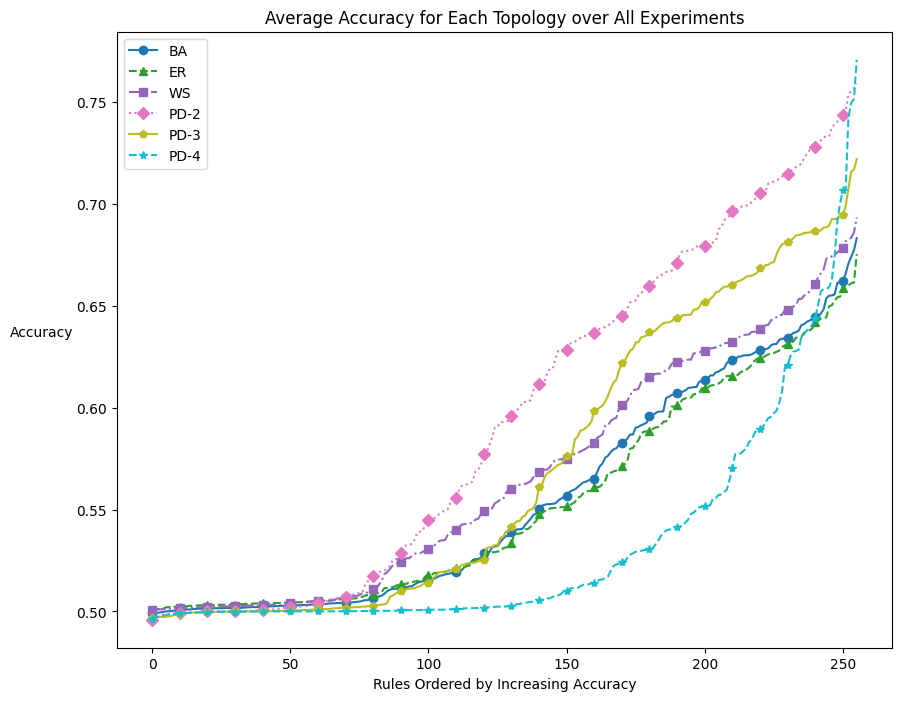

In [ ]:
from matplotlib.cm import get_cmap

# Step 1: Create a new DataFrame for averages
df_averages = df.copy()

for column in df_averages.columns:
    df_averages[column] = df_averages[column].apply(lambda x: np.mean(x))

group_averages_data = {}
num_groups = len(df_averages.columns) // 3 + (0 if len(df_averages.columns) % 3 == 0 else 1)

column_names = ['BA', 'ER', 'WS', 'PD-2', 'PD-3','PD-4']

for i in range(num_groups):
    # Select three columns for the current group
    group_columns = df_averages.columns[i*3:(i+1)*3]

    # Check if there are columns to process
    if group_columns.size > 0:
        # Compute the average of the selected columns for each row and assign it to the new group
        group_name = f'Group_{i+1}'
        group_averages_data[group_name] = df_averages[group_columns].apply(lambda x: np.mean(x), axis=1)

df_group_averages = pd.DataFrame(group_averages_data)
df_group_averages.columns = column_names


# Assuming df_group_averages is your DataFrame

# Define your line styles, markers, and marker frequency
styles_markers_and_frequency = [
    ('-', 'o', 10),  # Solid line with circles, every 10th data point
    ('--', '^', 10),  # Dashed line with triangles, every 10th data point
    ('-.', 's', 10),  # Dash-dot line with squares, every 10th data point
    (':', 'D', 10),   # Dotted line with diamonds, every 10th data point
    ('-', 'p', 10),  # Solid line with pentagons, every 10th data point
    ('--', '*', 10)   # Dashed line with stars, every 10th data point
]

# Number of columns to plot (should be 6 for your case)
num_columns = len(df_group_averages.columns)

# Choose your colormap
colormap = colormap = get_cmap('tab10', num_columns)

# Start plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each column with different line style, marker, and marker frequency
for idx, column in enumerate(df_group_averages.columns):
    sorted_averages = df_group_averages[column].sort_values().reset_index(drop=True)
    line_style, marker, markevery = styles_markers_and_frequency[idx]
    ax.plot(sorted_averages, label=column, color=colormap(idx), linestyle=line_style, marker=marker, markevery=markevery)

ax.set_ylabel('Accuracy', rotation=0, labelpad=25)
ax.set_xlabel('Rules Ordered by Increasing Accuracy')
ax.set_title('Average Accuracy for Each Topology over All Experiments')
ax.legend()

plt.show()


## Tables

### Normalized

In [ ]:
df_averages = df.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

df_averages = (df_averages - df_averages.min()) / (df_averages.max() - df_averages.min())

#df_averages = df.applymap(lambda x: (np.mean(x[:len(x)//2]) - np.mean(x[len(x)//2:])) if isinstance(x, list) and len(x) > 0 else np.nan)
df_averages['Total Score'] = df_averages.mean(axis=1)


# Check if there are at least three columns, to avoid errors
if len(df_averages.columns) >= 3:
    # Total score based on the average of the first three columns
    df_averages['Total Score First 3'] = df_averages.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_averages.columns) >= 6:
    # Total score based on the average of the second set of three columns
    df_averages['Total Score Second 3'] = df_averages.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_averages.columns) >= 9:
    # Total score based on the average of the third set of three columns
    df_averages['Total Score Last 3'] = df_averages.iloc[:, 6:9].mean(axis=1)

# Computing standard deviation for each original column
df_stddev = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan)

# Renaming columns to indicate these are standard deviations
df_stddev.columns = [f'{col} StdDev' for col in df_stddev.columns]

# Check if there are at least three columns, to avoid errors
if len(df_stddev.columns) >= 3:
    # Mean standard deviation based on the first three columns
    df_stddev['Mean StdDev First 3'] = df_stddev.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_stddev.columns) >= 6:
    # Mean standard deviation based on the second set of three columns
    df_stddev['Mean StdDev Second 3'] = df_stddev.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_stddev.columns) >= 9:
    # Mean standard deviation based on the third set of three columns
    df_stddev['Mean StdDev Last 3'] = df_stddev.iloc[:, 6:9].mean(axis=1)

# Combine the mean and standard deviation dataframes
df_combined = pd.concat([df_averages, df_stddev], axis=1)

# Compute total variation (standard deviation) across original columns and add as new column
# Here we assume df contains the original data, not the one with calculated means
total_variation = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan).mean(axis=1)
df_combined['Mean StdDev'] = total_variation

df_combined['Score Minus StdDev'] = df_combined['Total Score'] - df_combined['Mean StdDev']

df_sorted_by_total_score = df_combined.sort_values(by='Total Score', ascending=False)
df_final_sorted = df_sorted_by_total_score.drop(columns=['Total Score'])

# Display the DataFrame sorted by total score
df_sorted_by_total_score

,2NBias,2NAlt,2NNoise,3NBias,3NAlt,3NNoise,4NBias,4NAlt,4NNoise,Total Score,...,3NAlt StdDev,3NNoise StdDev,4NBias StdDev,4NAlt StdDev,4NNoise StdDev,Mean StdDev First 3,Mean StdDev Second 3,Mean StdDev Last 3,Mean StdDev,Score Minus StdDev
91,0.305381,0.862297,0.479342,0.531136,1.000000,0.948276,0.890744,1.000000,1.000000,0.779686,...,0.112334,0.111254,0.077391,0.112536,0.117639,0.077971,0.099762,0.102522,0.093418,0.686268
123,0.745032,0.709267,0.424132,0.942439,0.941531,0.633082,1.000000,0.955832,0.603765,0.772786,...,0.126546,0.087664,0.073132,0.117538,0.097147,0.104863,0.098395,0.095939,0.099732,0.673054
144,0.779447,0.846263,1.000000,0.703820,0.692848,0.927263,0.468386,0.475040,0.612281,0.722817,...,0.230679,0.162150,0.097978,0.227309,0.156638,0.149899,0.165305,0.160642,0.158615,0.564201
16,0.782841,0.839660,0.990859,0.659341,0.695107,0.925108,0.510369,0.464458,0.636486,0.722692,...,0.233434,0.165566,0.104425,0.230659,0.163996,0.150917,0.168186,0.166360,0.161821,0.560871
2,0.797382,0.837774,0.892870,0.624280,0.704893,0.995151,0.444107,0.462848,0.631555,0.710096,...,0.230138,0.171145,0.095722,0.233138,0.161432,0.151217,0.169007,0.163431,0.161218,0.548877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.005817,0.034897,0.014260,0.019362,0.029862,0.027478,0.040971,0.009892,0.050202,0.025860,...,0.024317,0.022776,0.023541,0.023099,0.019383,0.025201,0.024401,0.022008,0.023870,0.001990
222,0.016966,0.038670,0.020841,0.009942,0.023839,0.024784,0.029843,0.019784,0.047961,0.025848,...,0.023776,0.022249,0.017019,0.021184,0.017865,0.025109,0.021963,0.018689,0.021920,0.003928
221,0.000000,0.048338,0.019378,0.023548,0.028105,0.042565,0.028832,0.000000,0.036307,0.025230,...,0.024698,0.021792,0.021537,0.020134,0.020392,0.022030,0.021829,0.020688,0.021516,0.003715
50,0.011634,0.045037,0.017185,0.008896,0.023338,0.043103,0.020233,0.023925,0.032721,0.025119,...,0.024244,0.025648,0.024481,0.023189,0.022816,0.021378,0.024198,0.023495,0.023024,0.002095


Save table:

In [ ]:
# Specify your file path
file_path = 'sorted_data_norm.csv'

# Export the DataFrame to CSV
df_sorted_by_total_score.to_csv(file_path, index=True)

### Not normalized

In [ ]:
df_averages = df.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

#df_averages = df.applymap(lambda x: (np.mean(x[:len(x)//2]) - np.mean(x[len(x)//2:])) if isinstance(x, list) and len(x) > 0 else np.nan)
df_averages['Total Score'] = df_averages.mean(axis=1)


# Check if there are at least three columns, to avoid errors
if len(df_averages.columns) >= 3:
    # Total score based on the average of the first three columns
    df_averages['Total Score First 3'] = df_averages.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_averages.columns) >= 6:
    # Total score based on the average of the second set of three columns
    df_averages['Total Score Second 3'] = df_averages.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_averages.columns) >= 9:
    # Total score based on the average of the third set of three columns
    df_averages['Total Score Last 3'] = df_averages.iloc[:, 6:9].mean(axis=1)

# Computing standard deviation for each original column
df_stddev = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan)

# Renaming columns to indicate these are standard deviations
df_stddev.columns = [f'{col} StdDev' for col in df_stddev.columns]

# Check if there are at least three columns, to avoid errors
if len(df_stddev.columns) >= 3:
    # Mean standard deviation based on the first three columns
    df_stddev['Mean StdDev First 3'] = df_stddev.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_stddev.columns) >= 6:
    # Mean standard deviation based on the second set of three columns
    df_stddev['Mean StdDev Second 3'] = df_stddev.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_stddev.columns) >= 9:
    # Mean standard deviation based on the third set of three columns
    df_stddev['Mean StdDev Last 3'] = df_stddev.iloc[:, 6:9].mean(axis=1)

# Combine the mean and standard deviation dataframes
df_combined = pd.concat([df_averages, df_stddev], axis=1)

# Compute total variation (standard deviation) across original columns and add as new column
# Here we assume df contains the original data, not the one with calculated means
total_variation = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan).mean(axis=1)
df_combined['Mean StdDev'] = total_variation

df_combined['Score Minus StdDev'] = df_combined['Total Score'] - df_combined['Mean StdDev']

df_sorted_by_total_score = df_combined.sort_values(by='Total Score', ascending=False)
df_final_sorted = df_sorted_by_total_score.drop(columns=['Total Score'])

# Display the DataFrame sorted by total score
df_sorted_by_total_score

Save table:

In [ ]:
# Specify your file path
file_path = 'sorted_data.csv'

# Export the DataFrame to CSV
df_sorted_by_total_score.to_csv(file_path, index=True)

## Generate Elementary CA Summary Grid

Choose the numbers to display:

In [ ]:
# x > 0.7
specified_numbers = [91, 123 ]

In [ ]:
# 0.6 < x < 0.7
specified_numbers = [
    94, 144, 16, 56, 2, 98, 126, 116, 130, 30, 24, 46, 66, 118, 62, 107,
    121, 86, 48, 34, 131, 29, 145, 71, 125, 65, 176, 122, 111, 9, 31, 162,
    47, 133, 11, 117, 87, 33, 81, 63, 7, 3, 129, 119, 209, 135, 17, 38,
    37, 21, 80, 149, 112, 227, 52, 139, 120, 90, 185, 82, 41, 42, 10, 226,
    25, 97, 184, 61, 26, 152, 67, 106, 246, 194, 191, 103, 247, 190, 231, 189,
    181, 180, 208
]


In [ ]:
# 0.51 < x < 0.6
specified_numbers = [
    167, 124, 110, 166, 109, 210, 45, 161, 154, 138, 211, 245, 101, 155, 175, 225,
    75, 244, 169, 230, 146, 95, 188, 89, 174, 18, 193, 183, 241, 137, 182, 165, 242,
    22, 186, 15, 171, 20, 6, 243, 187, 88, 85, 5, 229, 74, 127, 134, 73, 177, 58, 148,
    173, 105, 114, 163, 27, 13, 151, 83, 69, 39, 57, 1, 159, 79, 215, 99, 93, 53, 214,
    170, 158, 102, 240, 60, 14, 147, 84, 28, 143, 157, 54, 213, 199, 70, 115, 36, 198
]


In [ ]:
# Less than 0.51
specified_numbers = [
    59, 202, 156, 216, 108, 78, 141, 113, 49, 228, 172, 164, 197, 43, 35, 92, 142, 150, 44, 212, 104, 178, 218, 224,
    219, 168, 201, 196, 153, 217, 100, 195, 203, 179, 140, 248, 237, 223, 234, 23, 77, 192, 4, 220, 76, 40, 68, 160, 8,
    239, 235, 51, 136, 253, 72, 255, 254, 251, 250, 32, 0, 252, 128, 96, 249, 232, 207, 236, 205, 206, 12, 55, 238, 64,
    204, 233, 50, 222, 200, 19, 221, 132
]

Generate grid:

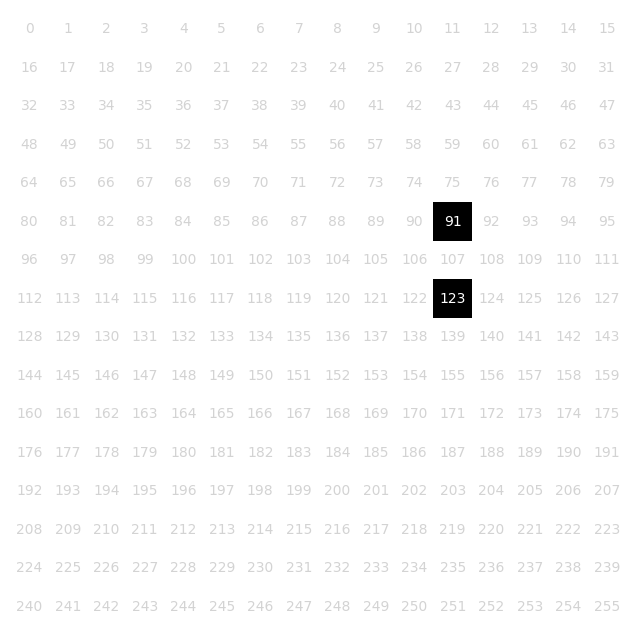

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size and create an empty grid
grid_size = 16
grid = np.ones((grid_size, grid_size))

# List of specified numbers to display


# Fill the grid positions corresponding to the specified numbers
for number in specified_numbers:
    row = number // grid_size
    col = number % grid_size
    grid[row, col] = 0  # Mark this position as filled

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
cmap = plt.cm.gray  # Use a gray colormap where 0 is white and 1 is black
ax.imshow(grid, cmap=cmap, interpolation='nearest')

# Annotate each cell with the corresponding rule number if it's in specified_numbers
for number in range(256):
    row = number // grid_size
    col = number % grid_size
    if number in specified_numbers:
        ax.text(col, row, str(number), ha='center', va='center', color="white")
    else:
        ax.text(col, row, str(number), ha='center', va='center', color="lightgray")

ax.axis('off')  # Turn off the axis
plt.show()